<h3> Iris and Setosa Dataset </h3>

<p> The Iris setosa dataset is a well-known and commonly used dataset in machine learning and statistics. It is often used as a beginner's dataset for classification tasks. The dataset consists of measurements of various features of Iris setosa flowers. Let's dive into more details. </p>

<ul> 

<li>  Origin and Collection: The Iris setosa dataset was introduced by the British statistician and biologist Ronald Fisher in his 1936 paper "The use of multiple measurements in taxonomic problems." The data was collected by Edgar Anderson, a biologist, who measured four features from 50 samples of Iris setosa flowers. The features include the lengths and widths of the sepals and petals. </li>

<li>  Dataset Structure: The Iris setosa dataset contains a total of 150 samples, each representing an individual Iris flower. The dataset is divided into three classes or species of Iris flowers: Iris setosa, Iris versicolor, and Iris virginica. Each sample consists of four features: sepal length, sepal width, petal length, and petal width. These measurements were taken in centimeters.
</li>

<li>  Usage and Purpose:
The dataset is commonly used to demonstrate and teach various machine learning and statistical concepts, particularly in the field of classification. Researchers and practitioners use the Iris setosa dataset to explore and experiment with different algorithms, techniques, and approaches in tasks such as pattern recognition, clustering, and classification.
</li>

<li>  Usage and Purpose:
The dataset is commonly used to demonstrate and teach various machine learning and statistical concepts, particularly in the field of classification. Researchers and practitioners use the Iris setosa dataset to explore and experiment with different algorithms, techniques, and approaches in tasks such as pattern recognition, clustering, and classification.
</li>

<li>
Applications:
The Iris setosa dataset has been widely used to evaluate the performance of classification algorithms and techniques. It serves as a benchmark for comparing and assessing the accuracy of different models. Researchers have also used the dataset for visualization purposes, exploring the relationships between different features and their impact on class separation.
</li>
</ul>

<img src ="./Flower.jpg" width = 300  height= 200>

<>

1. Import libraries


In [57]:
from sklearn import datasets
import plotly.express as px 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix

2. Load dataset


In [58]:
dataset = datasets.load_iris()
dir(dataset)


['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [59]:
X = dataset.data
Y = dataset.target

fn = dataset.feature_names[:]
fn.append('species')
Yn = np.array([dataset.target_names[i] for i in Y])                       # Describe outputs by target name 


total_data = np.concatenate((X , Yn.reshape(150,1)) , axis =1)   # Create dataframe with sklearn dataset 
df = pd.DataFrame(total_data, columns = fn)
df.describe()



,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150,150,150,150,150
unique,35,23,43,22,3
top,5.0,3.0,1.5,0.2,versicolor
freq,10,26,13,29,50


In [60]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y, shuffle=True, test_size= 0.33)



3. Create PCA visualization 

In [61]:
pca = PCA(n_components=3)
components = pca.fit_transform(X)


fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=df['species'],
    width= 600, height= 600,
    title=f'PCA for iris setosa dataset ',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

4. Perform Linear Discriminant Analysis 

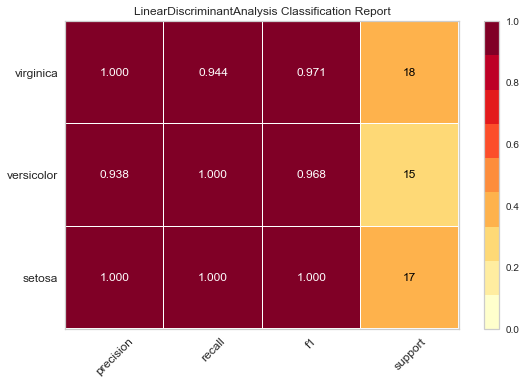

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Classification Report'}>

In [62]:
clf = LinearDiscriminantAnalysis()
clf.fit(Xtrain, Ytrain)

fn = dataset.target_names

visualizer = ClassificationReport(clf, classes= fn, support=True)

visualizer.fit(Xtrain, Ytrain)        # Fit the visualizer and the model
visualizer.score(Xtest, Ytest)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

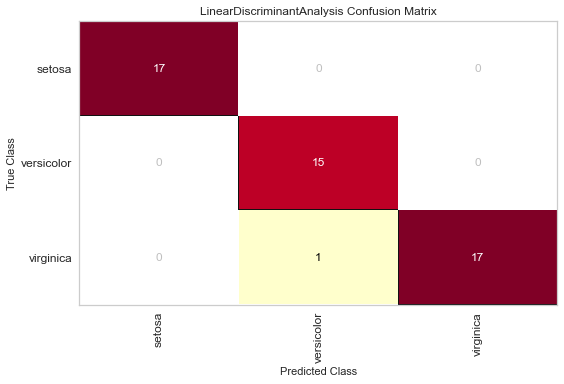

<AxesSubplot:title={'center':'LinearDiscriminantAnalysis Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [63]:
visualizer = ConfusionMatrix(clf, classes=fn)
visualizer.fit(Xtrain, Ytrain)
visualizer.score(Xtest, Ytest)
visualizer.show()